# 初学者向けPandas100本ノックver1.0.3

In [1]:
# ライブラリーの読み込み
import pandas as pd
import glob

# DataFrameの準備
df = pd.read_csv('./data/titanic3.csv')
df2 = pd.read_csv('./data/data1.csv')
df3 = pd.read_csv('./data/data1_2.csv')
df4 = pd.read_csv('./data/data1_3.csv')
df5 = pd.read_csv('./data/data2.csv',encoding='cp932')

# タイタニック号の生存者予測 (90 - 100)  
これまで触れてきたタイタニック号の乗客データを使用して、乗客の生存有無を  
予測してみます。  
  
※90～100については順番通りにやらないと上手く動作しません

In [2]:
# 【90】ラベルエンコーディング
# df_copyのsexとembarked列をラベルエンコーディング
# (from sklearn.preprocessing import LabelEncoderをインポート)
# (df_copyはdfをコピーしたもの)

df_copy =df.copy() # deep copy(値渡し)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #ラベルエンコーダのインスタンスを作成

df_copy['sex'] = le.fit_transform(df_copy['sex'].astype(str)) #エンコーディング
df_copy['embarked'] = le.fit_transform(df_copy['embarked'].astype(str)) #strに変換しないとエラー発生
df_copy.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,2,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,2,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,2,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,2,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,2,NaN,NaN,"Montreal, PQ / Chesterville, ON"


LabelEncoder についてはこのブログが分かりやすい。https://gotutiyan.hatenablog.com/entry/2020/09/08/122621  

・機械学習では文字列をそのまま、学習アルゴリズムに入力できないため、数値に変換する。LabelEncoder()では  
　例えば、以下のように文字列を数値に変換する。  

　male → 0  
　female → 1  

・RandomForestなど決定木での分類問題を解く場合には、ラベルエンコーディングすることが多い

In [3]:
# 【91】欠損値確認
# df_copyの欠損値を確認

df_copy.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

・isnull().sum()で欠損値数を確認  
・欠損値じゃないレコードの数を確認したい場合は、  
　notnull().sum()

In [4]:
# 【92】欠損値補完
# df_copyのage、fare列の欠損値を各列の平均値で補完

df_copy['age'] = df_copy['age'].fillna(df_copy['age'].mean()) #欠損値にageの平均値で補完
df_copy['fare'] = df_copy['fare'].fillna(df_copy['fare'].mean()) #欠損値にfareの平均値で補完
print(df_copy.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64


In [5]:
# 中央値で保管するなら
# df_copy['age'] = df_copy['age'].fillna(df_copy['age'].median())

In [6]:
# 【93】不要列の削除
# df_copyの中で機械学習で使用しない不要な行を削除
# (name, ticket, cabin, boat, body, home.destを削除)

df_copy = df_copy.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'],axis=1)
df_copy

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.000000,0,0,211.3375,2
1,1,1,1,0.920000,1,2,151.5500,2
2,1,0,0,2.000000,1,2,151.5500,2
3,1,0,1,30.000000,1,2,151.5500,2
4,1,0,0,25.000000,1,2,151.5500,2
...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,14.4542,0
1305,3,0,0,29.881138,1,0,14.4542,0
1306,3,0,1,26.500000,0,0,7.2250,0
1307,3,0,1,27.000000,0,0,7.2250,0


・行・列の削除をするにはdropを使用  
・列を削除する場合は、axis=1を指定(axis="columns"でもよい）  
（行を削除する場合は、axis=0）  

In [7]:
# 【94】ndarray形式への変換
# ①df_copyのpclass、age、sex、fare、embarkedの列を抽出し、ndarray形式に変換
# ②df_copyのsurvivedの列を抽出し、ndarray形式に変換
# (①をfeatures、②をtargetという変数にそれぞれ格納)

features = df_copy[['pclass','age','sex','fare','embarked']].values
target = df_copy['survived'].values

・pandas.DataFrameやpandas.Seriesをndarray形式(配列)に変換するにはvaluesを使用  
・機械学習ライブラリのscikit-learnではndarray形式で入力する  
　必要があるため、そのような際にDataFrameをndarrat形式に変換する

In [8]:
# 【95】学習データとテストデータに分割
# 【94】で作成したfeatrues、targetを学習データとテストデータに分割
# (from sklearn.model_selection import  train_test_splitをインポート)
# ※分割時のパラメータは次を指定 test_size=0.3 random_state=0

from sklearn.model_selection import  train_test_split

features , test_X , target , test_y = train_test_split(features, target , test_size = 0.3 , random_state = 0)

・データを学習データ、テストデータに分割する場合は train_test_splitを使用  
・test_sizeで分割する割合を指定  
・random_stateでシード値を指定することでデータ分割時の乱数を固定  
（検証で乱数を固定したい時に使用）

In [9]:
# 【96】学習の実行
# 学習データ(features、target)を用いランダムフォレストにて学習を実行
# (from sklearn.ensemble import RandomForestClassifierをインポート)
# ※パラメータは次を指定 n_estimators=100 random_state=0

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,random_state=0) # ランダムフォレストのインスタンスを作成

model.fit(features,target) # 学習の実行

RandomForestClassifier(random_state=0)

・RandomForestClassifierでランダムフォレストを呼び出し  
・ハイパーパラメータはn_estimatorsやmax_depthなどがある  
・.fit()にて学習を実行  
・入力値はndarray形式でないといけない  
（そのため、【94】にてndaaray形式に変換を実施）

In [10]:
# 【97】予測の実行
# test_Xデータの乗客の生存を予測

pred = model.predict(test_X)

.predict()にて予測を実行

In [11]:
# 【98】予測精度の確認
# 予測結果がtest_y(生存有無の答え)とどれぐらい
# 整合していたかを確認(評価指標はaccuracy)
# (from sklearn.metrics import accuracy_scoreをインポート)

from sklearn.metrics import accuracy_score

accuracy_score(pred,test_y)

0.7888040712468194

・accuracy_score(正解率)にて予測精度を検証  
・予測精度の評価指標には様々あるため、タスクに合わせて適切な指標を選択  

（参考）分類タスクの評価指標  
　https://qiita.com/jyori112/items/110596b4f04e4e1a3c9b

In [12]:
# 【99】重要度の確認
# 学習における各列(特徴量)の
# 重要度を表示

importace = model.feature_importances_ 

print('Feature Importances:')
for i, feat in enumerate(['pclass','age','sex','fare','embarked']):
    print('\t{0:20s} : {1:>.5f}'.format(feat, importace[i]))

Feature Importances:
	pclass               : 0.08893
	age                  : 0.28727
	sex                  : 0.27940
	fare                 : 0.31417
	embarked             : 0.03023


.feature_importances_にてランダムフォレストの学習における各列(特徴量)の重要度を確認可能

In [13]:
# 【100】予測結果のcsv出力
# test_Xの予測結果をcsvでoutputフォルダに出力(ファイル名は「submission.csv」)
# (headerは不要)

df_pred = pd.DataFrame(pred)
df_pred.to_csv('submission.csv',header=None)

・to_csvでcsv形式で出力  
・行番号、列名を削除して出力したいときは  
　index=None,header=Noneをつける

# 100本ノックお疲れ様でした

# おまけ：評価指数の表示

In [14]:
# 混合行列（sklearnの関数利用) 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, pred)
print(cm)

[[213  33]
 [ 50  97]]


In [15]:
# 混合行列を描画
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names):
    fig = plt.figure(figsize=(10, 10))
    heatmap = sns.heatmap(
        confusion_matrix, xticklabels=class_names, yticklabels=class_names,
        annot=True, fmt='d', cbar=True, square=True, cmap='YlGnBu')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Duplicate key in file WindowsPath('C:/Users/iiats/Anaconda3/envs/Python37/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  IPAexGothic')


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


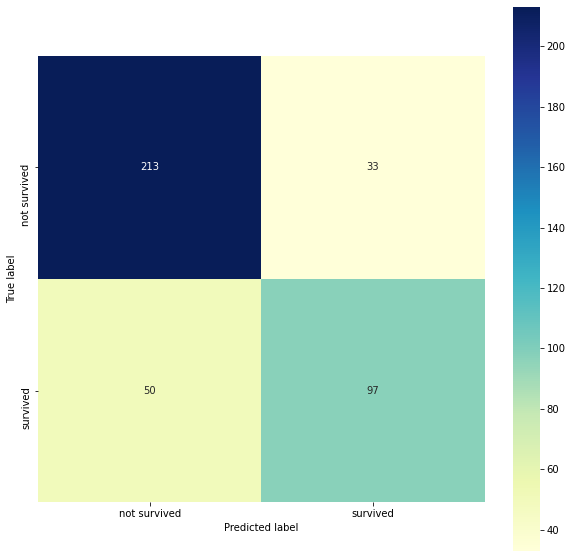

In [16]:
print_confusion_matrix(cm, ["not survived", "survived"])

In [17]:
from sklearn.metrics import classification_report

report = classification_report(test_y, pred, target_names=["not survived", "survived"], digits=3)
print(report)

              precision    recall  f1-score   support

not survived      0.810     0.866     0.837       246
    survived      0.746     0.660     0.700       147

    accuracy                          0.789       393
   macro avg      0.778     0.763     0.769       393
weighted avg      0.786     0.789     0.786       393

